# Lab 8 Solutions


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [ ]:

filename = "/content/drive/My Drive/SUSY.csv"
VarNames = ["signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta",
            "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
            "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)


In [ ]:
df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859





## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA).

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [ ]:
import sklearn.discriminant_analysis as DA
#Fisher=DA.LinearDiscriminantAnalysis()

In [ ]:
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [ ]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]
#filter
Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [ ]:
Fisher.fit(X_Train,y_Train) # see how well the model separates 2 classes
#should have minimal overlap

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

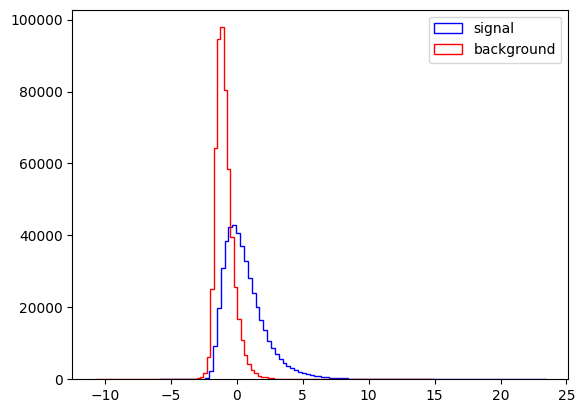

In [ ]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Decision scores for training and test sets
train_scores = Fisher.decision_function(X_Train)
test_scores = Fisher.decision_function(X_Test)

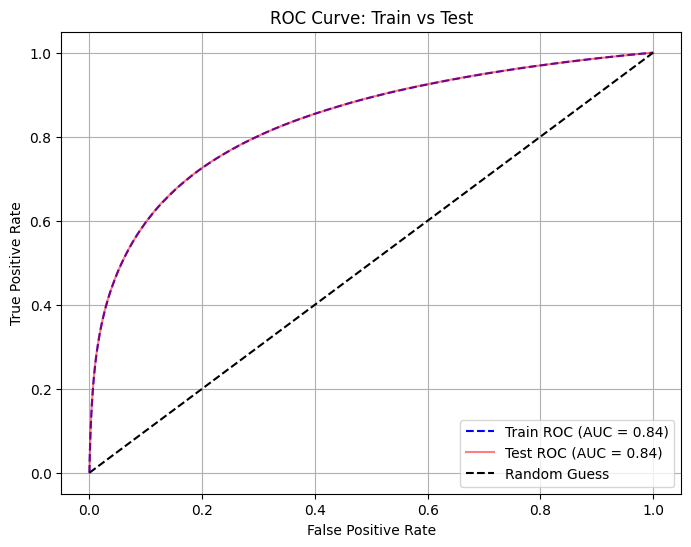

In [ ]:
# ROC for training
fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
auc_train = roc_auc_score(y_Train, train_scores)
# ROC for test
fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)
auc_test = roc_auc_score(y_Test, test_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, linestyle='--', label=f"Train ROC (AUC = {auc_train:.2f})", color="blue")
plt.plot(fpr_test, tpr_test, linestyle='-', label=f"Test ROC (AUC = {auc_test:.2f})", color="red", alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Train vs Test")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
print(f"Train AUC: {auc_train:.2f}")
print(f"Test AUC: {auc_test:.2f}")


Train AUC: 0.84
Test AUC: 0.84


The curves are plotting similarly on this ROC curve graph, this means that the model is not overfitting to the training data and therefore, making cosistent predictions on both data sets. It is concluded that there is little bias in this model as displayed by the AUC scores.

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

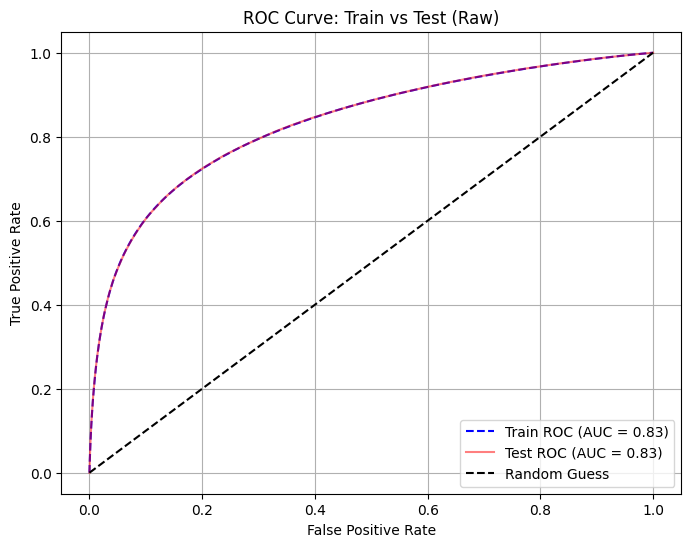

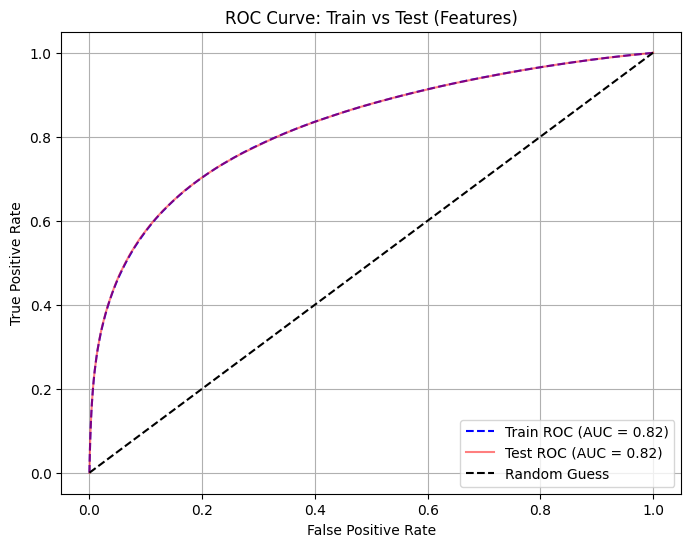

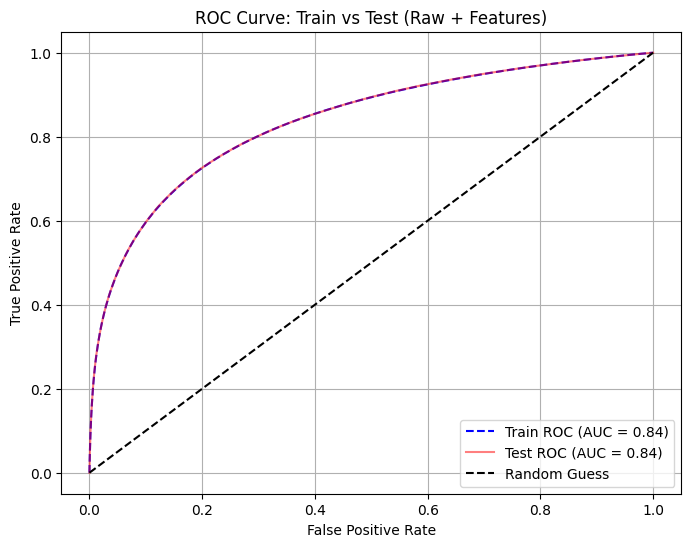

Raw: Train AUC = 0.83, Test AUC = 0.83
Features: Train AUC = 0.82, Test AUC = 0.82
Raw + Features: Train AUC = 0.84, Test AUC = 0.84


In [ ]:
RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT",
            "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames = list(set(VarNames[1:]).difference(RawNames))  # Exclude 'signal'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train Fisher model for raw, features, and combined
inputs = {
    "Raw": RawNames,
    "Features": FeatureNames,
    "Raw + Features": list(set(RawNames + FeatureNames))
}

results = {}

for input_type, cols in inputs.items():
    Fisher = LinearDiscriminantAnalysis()
    Fisher.fit(X_Train[cols], y_Train)

    train_scores = Fisher.decision_function(X_Train[cols])
    test_scores = Fisher.decision_function(X_Test[cols])

    auc_train = roc_auc_score(y_Train, train_scores)
    auc_test = roc_auc_score(y_Test, test_scores)
    results[input_type] = (auc_train, auc_test)

    fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
    fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, linestyle='--', label=f"Train ROC (AUC = {auc_train:.2f})", color="blue")
    plt.plot(fpr_test, tpr_test, linestyle='-', label=f"Test ROC (AUC = {auc_test:.2f})", color="red", alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve: Train vs Test ({input_type})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

for input_type, (auc_train, auc_test) in results.items():
    print(f"{input_type}: Train AUC = {auc_train:.2f}, Test AUC = {auc_test:.2f}")




AUC values of 0.83 and 0.82 indicate that the model has a good ability to discriminate between the signal and background classes. While it’s not perfect, it is performing better than random guessing (AUC = 0.5). The model is likely capturing the true relationship in the data rather than overfitting to noise in the training set.

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


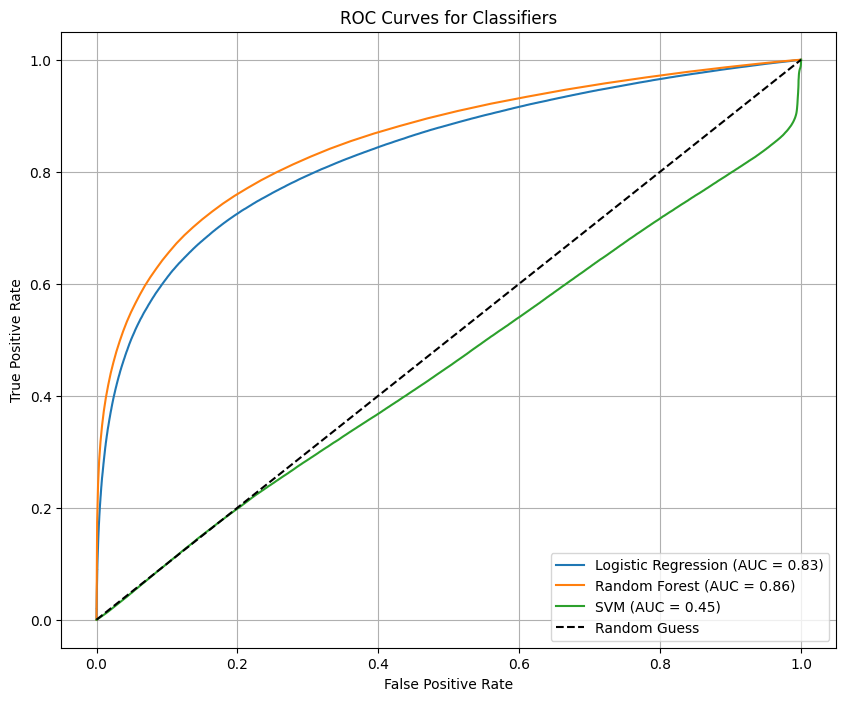

Logistic Regression: Test AUC = 0.83
Random Forest: Test AUC = 0.86
SVM: Test AUC = 0.45


In [ ]:
#a
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=50, n_jobs=-1),  # Reduce estimators for faster training
    "SVM": SVC(probability=True, max_iter=100)  # SVM with probability estimation
}

results = {}

# Step 1: Train and evaluate all classifiers
for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_Train[FeatureNames], y_Train)

    test_scores = clf.predict_proba(X_Test[FeatureNames])[:, 1]

    auc_test = roc_auc_score(y_Test, test_scores)

    results[clf_name] = {
        "clf": clf,
        "auc_test": auc_test,
        "test_scores": test_scores
    }

# Step 2: Plot ROC curves for all classifiers on test set
plt.figure(figsize=(10, 8))
for clf_name, result in results.items():
    fpr_test, tpr_test, _ = roc_curve(y_Test, result["test_scores"])
    plt.plot(fpr_test, tpr_test, label=f"{clf_name} (AUC = {result['auc_test']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves for Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

for clf_name, result in results.items():
    print(f"{clf_name}: Test AUC = {result['auc_test']:.2f}")


In [ ]:
#b
for input_type, cols in inputs.items():
    # Train
    clf = LogisticRegression()
    clf.fit(X_Train[cols], y_Train)

    results[input_type] = {"clf": clf, "features": cols}

    print(f"Classifier trained using {input_type}.")


Classifier trained using Raw.
Classifier trained using Features.
Classifier trained using Raw + Features.


In [ ]:
print('keys in results', results.keys())

keys in results dict_keys(['Logistic Regression', 'Random Forest', 'SVM', 'Raw', 'Features', 'Raw + Features'])


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

evaluation_results = {}

for input_type, data in results.items():
    if "clf" in data:
        clf = data["clf"]

        if "features" in data:
            cols = data["features"]
        else:
            # Handle the case where "features" is missing (for the raw models, for example)
            continue
        # Get probabilities of the positive class
        train_scores = clf.predict_proba(X_Train[cols])[:, 1]
        test_scores = clf.predict_proba(X_Test[cols])[:, 1]
        auc_train = roc_auc_score(y_Train, train_scores)
        auc_test = roc_auc_score(y_Test, test_scores)
        f1_train = f1_score(y_Train, clf.predict(X_Train[cols]))
        f1_test = f1_score(y_Test, clf.predict(X_Test[cols]))
        accuracy_train = accuracy_score(y_Train, clf.predict(X_Train[cols]))
        accuracy_test = accuracy_score(y_Test, clf.predict(X_Test[cols]))
        cm_train = confusion_matrix(y_Train, clf.predict(X_Train[cols]))
        cm_test = confusion_matrix(y_Test, clf.predict(X_Test[cols]))

        evaluation_results[input_type] = {
            "AUC_train": auc_train,
            "AUC_test": auc_test,
            "F1_train": f1_train,
            "F1_test": f1_test,
            "Accuracy_train": accuracy_train,
            "Accuracy_test": accuracy_test,
            "Confusion_matrix_train": cm_train,
            "Confusion_matrix_test": cm_test
        }

        # Print results for each input_type
        print(f"Results for {input_type}:")
        print(f"Train AUC: {auc_train:.2f}, Test AUC: {auc_test:.2f}")
        print(f"Train F1 Score: {f1_train:.2f}, Test F1 Score: {f1_test:.2f}")
        print(f"Train Accuracy: {accuracy_train:.2f}, Test Accuracy: {accuracy_test:.2f}")
        print(f"Train Confusion Matrix:\n{cm_train}")
        print(f"Test Confusion Matrix:\n{cm_test}")
        print("="*50)


Results for Raw:
Train AUC: 0.83, Test AUC: 0.83
Train F1 Score: 0.72, Test F1 Score: 0.72
Train Accuracy: 0.77, Test Accuracy: 0.77
Train Confusion Matrix:
[[1884605  285801]
 [ 641513 1188081]]
Test Confusion Matrix:
[[469874  71893]
 [160046 298187]]
Results for Features:
Train AUC: 0.83, Test AUC: 0.83
Train F1 Score: 0.72, Test F1 Score: 0.72
Train Accuracy: 0.77, Test Accuracy: 0.77
Train Confusion Matrix:
[[1888340  282066]
 [ 635690 1193904]]
Test Confusion Matrix:
[[471441  70326]
 [159102 299131]]
Results for Raw + Features:
Train AUC: 0.86, Test AUC: 0.86
Train F1 Score: 0.75, Test F1 Score: 0.75
Train Accuracy: 0.79, Test Accuracy: 0.79
Train Confusion Matrix:
[[1914359  256047]
 [ 591300 1238294]]
Test Confusion Matrix:
[[477985  63782]
 [147749 310484]]


In [ ]:
#c
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix

best_classifier = None
best_auc_test = -float('inf')  # Start with the smallest possible value

# Loop through the results and find the classifier with the highest test AUC
for input_type, data in results.items():
    if "clf" in data and "features" in data:
        clf = data["clf"]
        cols = data["features"]

        test_scores = clf.predict_proba(X_Test[cols])[:, 1]

        auc_test = roc_auc_score(y_Test, test_scores)

        if auc_test > best_auc_test:
            best_auc_test = auc_test
            best_classifier = (clf, cols)

# Step 2: Compute(AUC, F1, Accuracy) for the best classifier
if best_classifier:
    clf, cols = best_classifier

    train_scores = clf.predict_proba(X_Train[cols])[:, 1]
    test_scores = clf.predict_proba(X_Test[cols])[:, 1]

    auc_train = roc_auc_score(y_Train, train_scores)
    auc_test = roc_auc_score(y_Test, test_scores)
    f1_train = f1_score(y_Train, clf.predict(X_Train[cols]))
    f1_test = f1_score(y_Test, clf.predict(X_Test[cols]))
    accuracy_train = accuracy_score(y_Train, clf.predict(X_Train[cols]))
    accuracy_test = accuracy_score(y_Test, clf.predict(X_Test[cols]))
    cm_train = confusion_matrix(y_Train, clf.predict(X_Train[cols]))
    cm_test = confusion_matrix(y_Test, clf.predict(X_Test[cols]))

    print(f"Best Classifier (based on AUC Test): {best_classifier}")
    print(f"Train AUC: {auc_train:.2f}, Test AUC: {auc_test:.2f}")
    print(f"Train F1 Score: {f1_train:.2f}, Test F1 Score: {f1_test:.2f}")
    print(f"Train Accuracy: {accuracy_train:.2f}, Test Accuracy: {accuracy_test:.2f}")
    print(f"Train Confusion Matrix:\n{cm_train}")
    print(f"Test Confusion Matrix:\n{cm_test}")
else:
    print("No classifier found.")


Best Classifier (based on AUC Test): (LogisticRegression(), ['dPhi_r_b', 'MET', 'l_1_phi', 'l_1_eta', 'axial_MET', 'l_1_pT', 'l_2_phi', 'R', 'M_TR_2', 'l_2_eta', 'S_R', 'M_R', 'cos_theta_r1', 'MET_phi', 'M_Delta_R', 'l_2_pT', 'MT2', 'MET_rel'])
Train AUC: 0.86, Test AUC: 0.86
Train F1 Score: 0.75, Test F1 Score: 0.75
Train Accuracy: 0.79, Test Accuracy: 0.79
Train Confusion Matrix:
[[1914359  256047]
 [ 591300 1238294]]
Test Confusion Matrix:
[[477985  63782]
 [147749 310484]]


####Best method: Log Regression  ;Max significance: 86%    

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

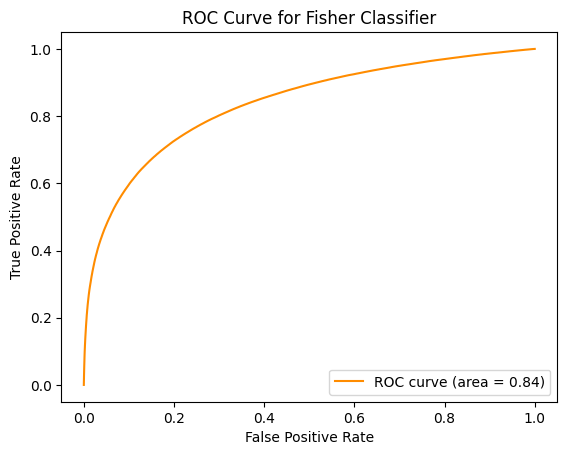

In [ ]:
from sklearn.metrics import roc_curve, auc
X_Test = X_Test[cols]
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))  # Use the same set of features

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fisher Classifier')
plt.show()



#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance.


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

results = {}

# Iterate over the inputs to calculate metrics for each scenario
for input_type, cols in inputs.items():
    clf = LogisticRegression()  # Initi Logistic Regression classifier
    clf.fit(X_Train[cols], y_Train)  # Train the model

    y_pred = clf.predict(X_Test[cols])
    y_prob = clf.predict_proba(X_Test[cols])[:, 1]  # Prob for the positive class

    fpr, tpr, _ = roc_curve(y_Test, y_prob)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_Test, y_pred)
    recall = recall_score(y_Test, y_pred)
    f1 = f1_score(y_Test, y_pred)
    accuracy = accuracy_score(y_Test, y_pred)


    results[input_type] = {
        'AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'Maximal Significance': max(tpr)  # Maximal TPR is considered as "Maximal Significance"
    }

results_df = pd.DataFrame(results).T  # Transpose to get the classifiers as rows
results_df


,AUC,Precision,Recall,F1 Score,Accuracy,Maximal Significance
Raw,0.831423,0.805737,0.650732,0.719986,0.768061,1.0
Features,0.833821,0.809650,0.652792,0.722809,0.770572,1.0
Raw + Features,0.858159,0.829581,0.677568,0.745908,0.788469,1.0
